(chap-offset-dataframe)=
# Aufgabe 8: Funktionen in *DataFrames*

## Theorie

In dieser Aufgabe haben wir das Ziel, die in der letzten Aufgabe ({ref}`chap-random-numbers`) erstellte Funktion `offset_coordinate()` auf alle Zeckenstich-Koordinaten anwenden. Bildlich gesprochen: Wir nehmen unsere Zeckenstichdatensatz und schütteln ihn **einmal** durch. So erhalten wir einen Datensatz ähnlich wie in {numref}`arcgiszecken` mit dem Unterschied, dass jede Zeckenstichmeldung nicht eine *Wolke* von simulierten Punkten enthält, sondern nur einen einzelnen Punkt.

Nutze hier die Datei "zeckenstiche.csv" von letzter Woche (du kannst auch sie [hier erneut runterladen](https://raw.githubusercontent.com/ratnanil/codingingis/master/zeckenstiche.csv), Rechtsklick --> Ziel speichern unter). Erstelle ein neues Notebook und nutze nachstehenden Code um die nötigen Module und Functions zu haben:



In [171]:
# to add figures to images.. havent found out how to do this yet
from myst_nb import glue

In [172]:
import pandas as pd

def offset_coordinate(old, distance = 100):
    import random
    new = old + random.normalvariate(0,distance)

    return(new)

zeckenstiche = pd.read_csv("zeckenstiche.csv")

zeckenstiche

,ID,accuracy,x,y
0,2550,439.128951,2681116,1250648
1,10437,301.748542,2681092,1250672
2,9174,301.748542,2681128,1250683
3,8773,301.748542,2681111,1250683
4,2764,301.748529,2681131,1250692
5,2513,301.748529,2681171,1250711
6,9185,301.748542,2681107,1250712
7,28521,301.748542,2681124,1250720
8,26745,301.748542,2681117,1250725
9,27391,301.748542,2681138,1250725


## Übungen

### Übung 8.1: Spalten selektieren

Mache dich nochmals damit vertraut, einzelne Spalten zu selektieren. Schau dir {ref}`chap-dataframes` nochmals an wenn du nicht mehr weisst wie das geht.

In [185]:
# Musterlösung

zeckenstiche["x"]
zeckenstiche["y"]

0    1250648
1    1250672
2    1250683
3    1250683
4    1250692
5    1250711
6    1250712
7    1250720
8    1250725
9    1250725
Name: y, dtype: int64

### Übung 8.2: Neue Spalten erstellen

Mache dich nochmals damit vertraut, wie man neue Spalten erstellt. Schau dir {ref}`chap-dataframes` nochmals an wenn du nicht mehr weisst wie das geht. Erstelle ein paar neue Spalten nach dem Beispiel unten um die Hangriffe zu üben. Lösche die Spalten im Anschluss wieder mit `del zeckenstiche['test1']` etc.

In [192]:
# Musterlösung

zeckenstiche["test1"] = "test1"

zeckenstiche["test2"] = 10

zeckenstiche["test3"] = [1,2,3,4,5,6,7,8,9,10]


In [190]:
zeckenstiche

,ID,accuracy,x,y,x_sim,y_sim,test,test2
0,2550,439.128951,2681116,1250648,2.681235e+06,1.250388e+06,test1,1
1,10437,301.748542,2681092,1250672,2.680996e+06,1.250730e+06,test1,2
2,9174,301.748542,2681128,1250683,2.681217e+06,1.250867e+06,test1,3
3,8773,301.748542,2681111,1250683,2.681108e+06,1.250912e+06,test1,4
4,2764,301.748529,2681131,1250692,2.681053e+06,1.250907e+06,test1,5
5,2513,301.748529,2681171,1250711,2.681110e+06,1.250529e+06,test1,6
6,9185,301.748542,2681107,1250712,2.680953e+06,1.250924e+06,test1,7
7,28521,301.748542,2681124,1250720,2.681130e+06,1.251026e+06,test1,8
8,26745,301.748542,2681117,1250725,2.681117e+06,1.250650e+06,test1,9
9,27391,301.748542,2681138,1250725,2.680956e+06,1.250363e+06,test1,10


In [193]:
# Musterlösung

del zeckenstiche['test1']
del zeckenstiche['test2']
del zeckenstiche['test3']

(ex-apply)=
### Übung 8.3: `apply`

`pandas` kennt eine ganze Familie von Methoden, um Spalten zu Manipulieren und Daten zu Aggregiren (`apply`, `map`, `mapapply`, `assign`). Es würde den Rahmen von diesem Kurs sprengen, die alle im Detail durch zu gehen, es lohnt sich aber sehr sich mit diesen zu befassen wenn man in sich näher mit Python befassen möchte.

Im unseren Fall brauchen wir lediglich die Methode `apply` um die Funktion `offset_coordiante()` auf die Zeckenstichkoordinaten anzuwenden. Dabei gehen wir wie folgt for:


In [195]:
zeckenstiche["x"].apply(offset_coordinate)
#\______1_______/ \_2_/\_______3_________/

# 1. Spalte selektieren (["x"])
# 2. Methode "apply" aufrufen
# 3. Function übergeben

0    2.681014e+06
1    2.681060e+06
2    2.681146e+06
3    2.681054e+06
4    2.681032e+06
5    2.681116e+06
6    2.681015e+06
7    2.681033e+06
8    2.681189e+06
9    2.681059e+06
Name: x, dtype: float64

Verwende dieses Schema um auch `offset_coordinate` auf die `y` Spalte anzuwenden und speichere den Output dieser beiden Operationen als neue Spalten `x_sim` sowie `y_sim`. Die *DataFrame* `zeckenstiche` sollte danach wie folgt aussehen:

In [175]:
# Musterlösung

zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate)
zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate)

0    1.250723e+06
1    1.250747e+06
2    1.250758e+06
3    1.250758e+06
4    1.250767e+06
5    1.250786e+06
6    1.250787e+06
7    1.250795e+06
8    1.250800e+06
9    1.250800e+06
Name: y, dtype: float64

In [199]:
zeckenstiche

,ID,accuracy,x,y,x_sim,y_sim,test
0,2550,439.128951,2681116,1250648,2.681235e+06,1.250388e+06,test1
1,10437,301.748542,2681092,1250672,2.680996e+06,1.250730e+06,test1
2,9174,301.748542,2681128,1250683,2.681217e+06,1.250867e+06,test1
3,8773,301.748542,2681111,1250683,2.681108e+06,1.250912e+06,test1
4,2764,301.748529,2681131,1250692,2.681053e+06,1.250907e+06,test1
5,2513,301.748529,2681171,1250711,2.681110e+06,1.250529e+06,test1
6,9185,301.748542,2681107,1250712,2.680953e+06,1.250924e+06,test1
7,28521,301.748542,2681124,1250720,2.681130e+06,1.251026e+06,test1
8,26745,301.748542,2681117,1250725,2.681117e+06,1.250650e+06,test1
9,27391,301.748542,2681138,1250725,2.680956e+06,1.250363e+06,test1


(ex-param)=
### Übung 8.4: Zusätzliche Parameter

In {ref}`ex-apply` haben wir unsere Funktion `offset_coordinate` aufgerufen, ohne den Paramter `distance` zu spezifizieren. Dies war möglich, weil wir für `distance` einen Defaultwert festgelegt hat (100 Meter). Wir können aber auch zusätzliche Parameter kommagetrennt nach der Funktion angeben. Dies sieht folgendermassen aus:

In [200]:
zeckenstiche["x"].apply(offset_coordinate,distance = 200)

0    2.681316e+06
1    2.681364e+06
2    2.681426e+06
3    2.681119e+06
4    2.681374e+06
5    2.681224e+06
6    2.681245e+06
7    2.681132e+06
8    2.681257e+06
9    2.681304e+06
Name: x, dtype: float64

Nuzte diese Möglichkeit, um die den Offset (`distance`) auf lediglich etwa 10 Meter zu reduzieren.

In [202]:
# Musterlösung

zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate, distance = 10)
zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate, distance = 10)

### Übung 8.5: Simulation visualisieren

Um die Original `x`/`y`-Werte sowie die Simulierten Daten im gleichen Plot darzustellen, wird folgendermassen vorgegangen: Der erste Datensatz wird mit `.plot()` visualisiert, wobei der Output einer Variabel  (z.B. `basemap`)  zugewiesen wird. Danach wird der zweite Datensatz ebenfalls mit `.plot()` visualisiert, wobei auf den ersten Plot via dem Argument `ax` verwiesen wird.

Bei den roten Punkten handelt es sich um die Original-Zeckenstichen, bei den blauen um die simulierten (leicht verschoben) Zeckenstiche. Visualisiere deine eigenen Zeckenstiche auf diese Weise.

In [178]:
from matplotlib import pyplot as plt

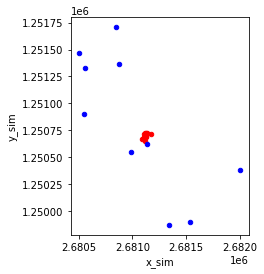

In [216]:
basemap = zeckenstiche.plot.scatter("x", "y", color = "red")
zeckenstiche.plot.scatter("x_sim", "y_sim", ax = basemap, color = "blue")

plt.axis("scaled")

plt.show()

### Übung 8.6: Genauigkeitsangaben der Punkte mitberücksichtigen.

In {ref}`ex-param` haben wir alle Punkte um etwa die gleiche Distaz (+/- 10m) verschoben. Wenn wir unsere *DataFrame* "zeckensiche" genau anschauen, steht uns eine Genauigkeitsangabe pro Punkt zur Verfügung: Die Spalte `accuracy`. Diese Spalte ist eine Genauigkeitsangabe über den gemeldeten Zeckenstich. Sie sagt etwas darüber aus, wie sicher der/die Nutzer\*in bei der Standortsangabe war (z.B. "*Diese Meldung ist etwa auf 300 Meter genau*"). Wir können diese Genauigkeitsangabe auch nutzen um den offset *pro Punkt* zu bestimmen.

Nutze die Spalte `accuracy` als Argument des Parameters `distance` in der Funktion `offset_coordinate` um genau dies zu erreichen.

In [180]:
zeckenstiche

,ID,accuracy,x,y,x_sim,y_sim
0,2550,439.128951,2681116,1250648,2.681338e+06,1.250639e+06
1,10437,301.748542,2681092,1250672,2.680974e+06,1.250536e+06
2,9174,301.748542,2681128,1250683,2.681017e+06,1.250647e+06
3,8773,301.748542,2681111,1250683,2.681162e+06,1.250686e+06
4,2764,301.748529,2681131,1250692,2.681015e+06,1.250626e+06
5,2513,301.748529,2681171,1250711,2.681211e+06,1.250604e+06
6,9185,301.748542,2681107,1250712,2.681062e+06,1.250743e+06
7,28521,301.748542,2681124,1250720,2.681053e+06,1.250674e+06
8,26745,301.748542,2681117,1250725,2.681030e+06,1.250711e+06
9,27391,301.748542,2681138,1250725,2.681202e+06,1.250808e+06


In [215]:
# Musterlösung

zeckenstiche["x_sim"] = zeckenstiche["x"].apply(offset_coordinate, distance = zeckenstiche["accuracy"])
zeckenstiche["y_sim"] = zeckenstiche["y"].apply(offset_coordinate, distance = zeckenstiche["accuracy"])

zeckenstiche

,ID,accuracy,x,y,x_sim,y_sim,test
0,2550,439.128951,2681116,1250648,2.680985e+06,1.250548e+06,test1
1,10437,301.748542,2681092,1250672,2.680552e+06,1.250897e+06,test1
2,9174,301.748542,2681128,1250683,2.680877e+06,1.251368e+06,test1
3,8773,301.748542,2681111,1250683,2.680848e+06,1.251707e+06,test1
4,2764,301.748529,2681131,1250692,2.681340e+06,1.249868e+06,test1
5,2513,301.748529,2681171,1250711,2.680500e+06,1.251468e+06,test1
6,9185,301.748542,2681107,1250712,2.681138e+06,1.250622e+06,test1
7,28521,301.748542,2681124,1250720,2.681535e+06,1.249898e+06,test1
8,26745,301.748542,2681117,1250725,2.682005e+06,1.250377e+06,test1
9,27391,301.748542,2681138,1250725,2.680562e+06,1.251333e+06,test1


Visualisiere nun die Daten. Was ist hier passiert?

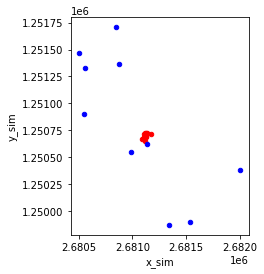

In [217]:
# Musterlösung
basemap = zeckenstiche.plot.scatter("x", "y", color = "red")
zeckenstiche.plot.scatter("x_sim", "y_sim", ax = basemap, color = "blue")

plt.axis("scaled")

plt.show()